In [47]:
import pandas as pd
import numpy as np

In [48]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd #data processing

import os
import re
import nltk

In [49]:
def Prep(label):
    x=[]
    for i in range(50):
        x.append(label)
    return x

In [50]:
df1 = pd.read_csv('ML_interview.csv')

In [51]:
df1['Label']=Prep('ML')
df1.head()

,Unnamed: 0,questions,Label
0,0,What is Machine learning?,ML
1,1,Mention the difference between Data Mining an...,ML
2,2,What is ‘Overfitting’ in Machine learning?,ML
3,3,Why overfitting happens?,ML
4,4,How can you avoid overfitting ?,ML


In [52]:
df2 = pd.read_csv("Reactjs_interview.csv")
df2['Label']=Prep('ReactJs')
df2.head()

,Unnamed: 0,questions,Label
0,0,What is React?,ReactJs
1,3,What are the features of ReactJS?,ReactJs
2,4,What are the Advantages of React JS?,ReactJs
3,6,How ReactJS framework is different as compare...,ReactJs
4,7,Does ReactJS use HTML?,ReactJs


In [53]:
df3 = pd.read_csv("BigData_interview.csv")
df3['Label']=Prep('BigData')
df3.head()

,Unnamed: 0,questions,Label
0,0,What do you know about the term “Big Data”?,BigData
1,1,What are the five V’s of Big Data?,BigData
2,2,Tell us how big data and Hadoop are related t...,BigData
3,3,How is big data analysis helpful in increasin...,BigData
4,4,Explain the steps to be followed to deploy a ...,BigData


In [54]:
train=df1.append(df2).append(df3)

In [55]:
train

,Unnamed: 0,questions,Label
0,0,What is Machine learning?,ML
1,1,Mention the difference between Data Mining an...,ML
2,2,What is ‘Overfitting’ in Machine learning?,ML
3,3,Why overfitting happens?,ML
4,4,How can you avoid overfitting ?,ML
5,6,What is inductive machine learning?,ML
6,7,What are the five popular algorithms of Machi...,ML
7,8,What are the different Algorithm techniques i...,ML
8,9,What are the three stages to build the hypoth...,ML
9,10,What is the standard approach to supervised l...,ML


In [56]:
train.drop('Unnamed: 0',1,inplace=True)

In [57]:
train.Label.unique()

array(['ML', 'ReactJs', 'BigData'], dtype=object)

In [58]:
train.Label.replace({'ML':0,'ReactJs':1,'BigData':2},inplace=True)

In [59]:
train=train.fillna(' ')

## Creating Word Cloud

In [60]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in train[train['Label']==0].questions: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['Label']==1].questions: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "
    
for val in train[train['Label']==2].questions: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

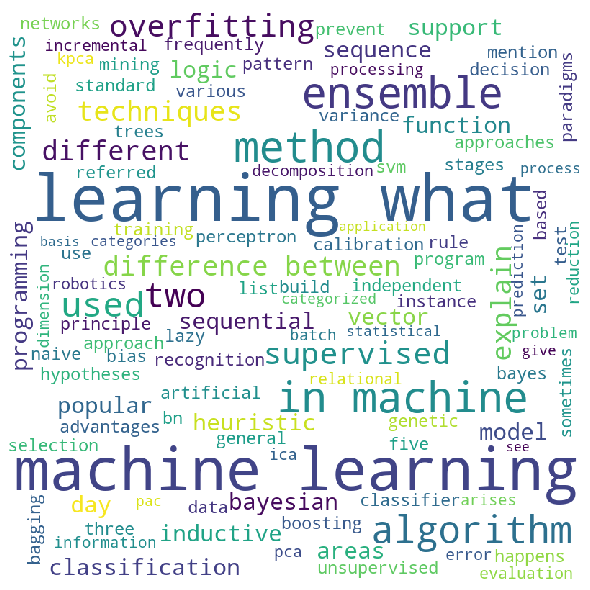

In [61]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(real_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Lets apply NLP

In [62]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [63]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [64]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [65]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['questions']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'total'] = filter_sentence

In [66]:
train = train[['questions','Label']]

In [67]:
train.head()

,questions,Label
0,What is Machine learning?,0
1,Mention the difference between Data Mining an...,0
2,What is ‘Overfitting’ in Machine learning?,0
3,Why overfitting happens?,0
4,How can you avoid overfitting ?,0


## Lets applying NLP Technique

In [68]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
X_train=train['questions']
Y_train=train['Label']

# TF-iDF Vectorizer

In [70]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

# Apply

In [71]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [72]:
tf_idf_matrix

<150x374 sparse matrix of type '<class 'numpy.float64'>'
	with 1182 stored elements in Compressed Sparse Row format>

# Modelling

In [73]:
#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train,test_size=0.3,\
                                                    random_state=0)

# Logistic Regression

In [74]:
#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train,test_size=0.3,\
                                                    random_state=0)
#Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Lasso classifier on training set: 1.00
Accuracy of Lasso classifier on test set: 0.93


In [75]:
from sklearn.metrics import f1_score,recall_score,precision_score
print(f1_score(y_test,pred,average='micro'))
print(recall_score(y_test,pred,average='micro'))
print(precision_score(y_test,pred,average='micro'))

0.9333333333333333
0.9333333333333333
0.9333333333333333


## MultinomialNB

In [76]:
#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train,\
                                                    test_size=0.3,\
                                                    random_state=0)

from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))

Accuracy of NB  classifier on training set: 1.00
Accuracy of NB classifier on test set: 0.78


In [77]:
from sklearn.metrics import f1_score,recall_score,precision_score
print(f1_score(y_test,pred,average='micro'))
print(recall_score(y_test,pred,average='micro'))
print(precision_score(y_test,pred,average='micro'))

0.7777777777777778
0.7777777777777778
0.7777777777777778


## RF

In [78]:
#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train,test_size=0.3,\
                                                    random_state=0)

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print('Accuracy of RF  classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of RF  classifier on training set: 0.98
Accuracy of RF classifier on test set: 0.80


In [79]:
from sklearn.metrics import f1_score,recall_score,precision_score
print(f1_score(y_test,pred,average='micro'))
print(recall_score(y_test,pred,average='micro'))
print(precision_score(y_test,pred,average='micro'))

0.8000000000000002
0.8
0.8


### From above the best accuracy we get from Logistic Regression

# Setting Pipeline

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn import linear_model
import warnings
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])

In [42]:
pipeline

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1

In [43]:
X_train = train['questions']
Y_train = train['Label']

In [44]:
pipeline.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1

In [45]:
#saving the pipeline
filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

['pipeline.sav']